In [1]:
from enrichment import spatial_enrichment, qc_plot_enrichment_histogram, find_topk_scores, find_topk_colocalized
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Axel\anaconda3\envs\bioinformatics\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Generate some random example data
npts, ngenes = int(1e6), 200
xy = np.random.rand(npts, 2)
genes = np.random.randint(low=0, high=ngenes, size=npts)

In [3]:
result = spatial_enrichment(xy, genes, method='knn', fixed_resample=False)

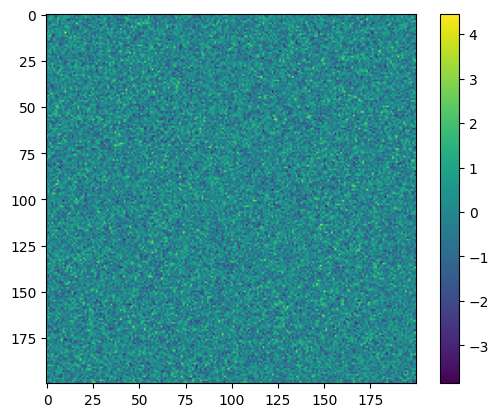

In [4]:
# Plot result
plt.imshow(result['z_scores'])
plt.colorbar()

100%|██████████| 1000/1000 [00:25<00:00, 39.09it/s]


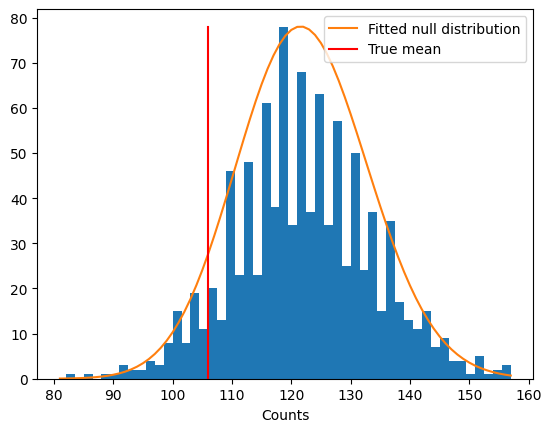

In [5]:
# Make a QC plot comparing enrichment between label 0 and label 1
# This function uses monte carlo sampling, so it might be slow
qc_plot_enrichment_histogram(result, 0, 1)
# If everything is OK, the null distribution should match the histogram

In [6]:
import pandas as pd
# Real dataset
df = pd.read_csv('example_data.csv')
df

,x,y,label
0,95,392,MLXIPL
1,101,392,MLXIPL
2,300,158,MLXIPL
3,80,261,MXD4
4,112,285,MXD4
...,...,...,...
561480,14928,14497,EPCAM
561481,14882,14891,MAX
561482,14889,14904,MAX
561483,14894,14849,MAX


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('example_data.csv')
result = spatial_enrichment(df=df, xy_columns=['x','y'], label_column='label')

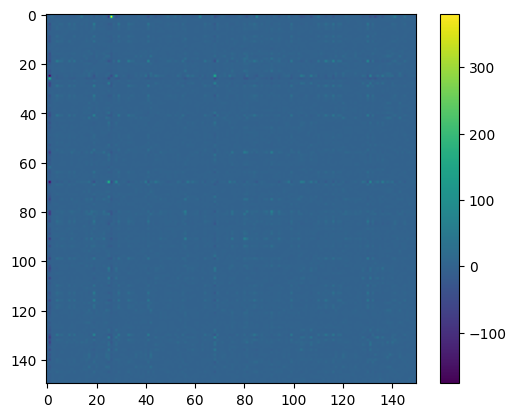

In [8]:
plt.imshow(result['z_scores'])
plt.colorbar()

In [9]:
scores = find_topk_scores(result, 10)
scores

[('ALBUMIN', 'CPS1'),
 ('IGFBP7', 'COLIVA1'),
 ('CPS1', 'ALBUMIN'),
 ('COLIVA1', 'IGFBP7'),
 ('IGFBP7', 'CTHRC1'),
 ('IGFBP7', 'SMA/ACTA2'),
 ('CDH1', 'SLC19A1'),
 ('SLC19A1', 'CDH1'),
 ('ALBUMIN', 'MLXIPL'),
 ('ALBUMIN', 'GPX3')]

In [13]:
scores = find_topk_colocalized(result, 500)
scores

[('ALBUMIN', 'CPS1'),
 ('COLIVA1', 'IGFBP7'),
 ('CDH1', 'SLC19A1'),
 ('CTHRC1', 'IGFBP7'),
 ('CDH1', 'EPCAM'),
 ('IGFBP7', 'SMA/ACTA2'),
 ('MAX', 'MXD4'),
 ('CDH1', 'PTK2'),
 ('COLIVA1', 'SMA/ACTA2'),
 ('FZD9', 'MXD4'),
 ('COLIVA1', 'CTHRC1'),
 ('CDH1', 'CTNNB1'),
 ('FZD9', 'MAX'),
 ('CDH1', 'PRKCZ'),
 ('ARPC3', 'CDH1'),
 ('EPCAM', 'SLC19A1'),
 ('COLIVA1', 'PDGFRB'),
 ('CDH1', 'DVL1'),
 ('COLIVA1', 'POSTN'),
 ('IGFBP7', 'PDGFRB'),
 ('IGFBP7', 'TBX2'),
 ('PTK2', 'SLC19A1'),
 ('EPCAM', 'PTK2'),
 ('NOC4L', 'SLC19A1'),
 ('CDH1', 'MLXIP'),
 ('CTNNB1', 'EPCAM'),
 ('CTNNB1', 'SLC19A1'),
 ('MLXIP', 'SLC19A1'),
 ('LDB2', 'MXD4'),
 ('ARPC3', 'SLC19A1'),
 ('ARPC3', 'EPCAM'),
 ('CDH1', 'NOC4L'),
 ('ENG', 'IGFBP7'),
 ('PRKCZ', 'SLC19A1'),
 ('MAX', 'MCAM'),
 ('DVL1', 'SLC19A1'),
 ('FZD9', 'LDB2'),
 ('MCAM', 'MXD4'),
 ('COLIVA1', 'TBX2'),
 ('POSTN', 'SMA/ACTA2'),
 ('ARPC3', 'CTNNB1'),
 ('CDH1', 'IHH'),
 ('IGFBP7', 'PDPN'),
 ('GGT5', 'IGFBP7'),
 ('EPCAM', 'MLXIP'),
 ('EPCAM', 'NOC4L'),
 ('IGFBP7', 'NG